# Problem 1

In [61]:

import matplotlib.cm as cm
import numpy as np
from matplotlib import pylab as plt
from matplotlib import pyplot as plt1
import imageio
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Part A and B

In [50]:
# Reading data for the training set
train_labels, train_data = [], []
with open('./faces/train.txt') as f:
    for line in f:
        im = imageio.imread(line.strip().split()[0])
        train_data.append(im.reshape(2500,))
        train_labels.append(line.strip().split()[1])

# Convert lists to NumPy arrays
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

# Reading data for the test set
test_labels, test_data = [], []
with open('./faces/test.txt') as f:
    for line in f:
        im = imageio.imread(line.strip().split()[0])
        test_data.append(im.reshape(2500,))
        test_labels.append(line.strip().split()[1])

# Convert lists to NumPy arrays
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

/var/folders/nr/9dz9m8pd2752bz2rmpkbrcs40000gn/T/ipykernel_21344/3255843843.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])
/var/folders/nr/9dz9m8pd2752bz2rmpkbrcs40000gn/T/ipykernel_21344/3255843843.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])


# Part C

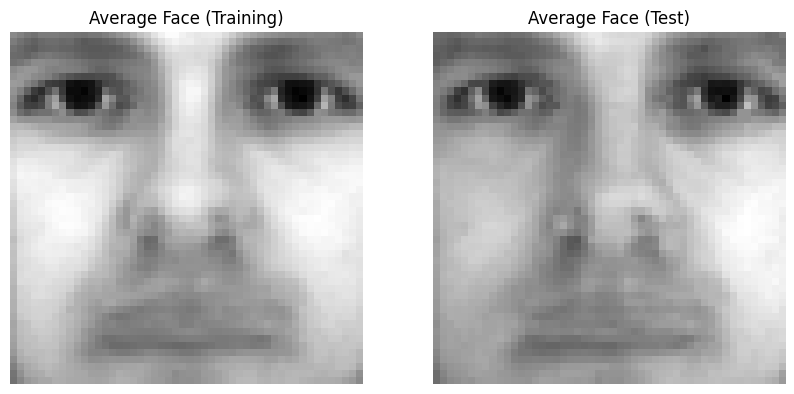

In [51]:
# Compute the average face for the training set
average_face_train = np.mean(train_data, axis=0)

# Compute the average face for the test set
average_face_test = np.mean(test_data, axis=0)

# Create a subplot to fit both images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the average face for the training set
axes[0].imshow(average_face_train.reshape(50, 50), cmap='gray')
axes[0].set_title('Average Face (Training)')

# Display the average face for the test set
axes[1].imshow(average_face_test.reshape(50, 50), cmap='gray')
axes[1].set_title('Average Face (Test)')

# Remove axis for better visibility
for ax in axes:
    ax.axis('off')

# Show the figure
plt.show()

# Part D

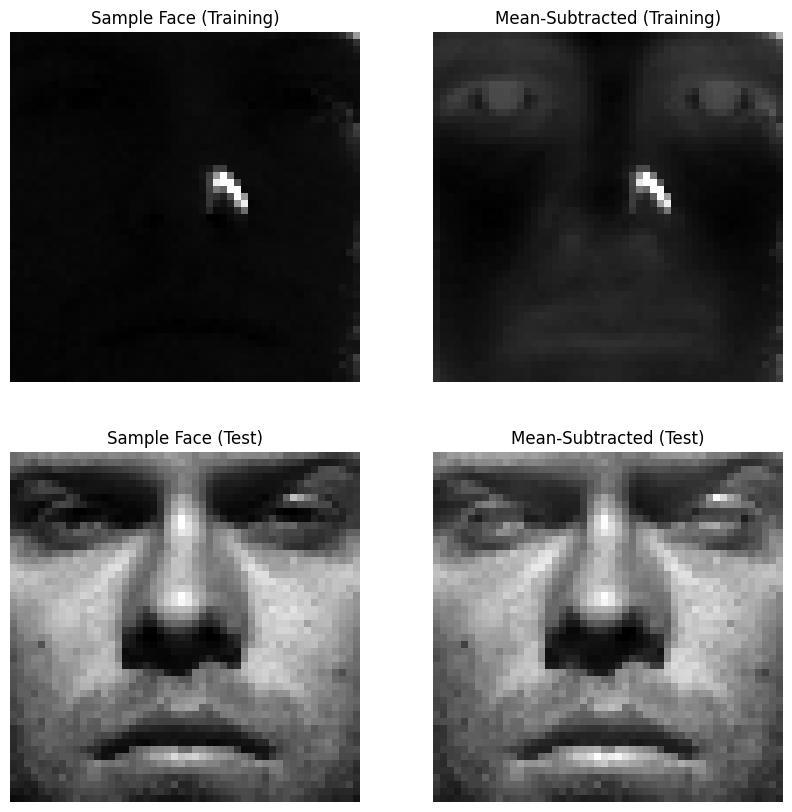

In [52]:
# Mean subtraction for the training set
mean_subtracted_train = train_data - average_face_train

# Mean subtraction for the test set using the precomputed average face µ from the training set
mean_subtracted_test = test_data - average_face_train

# Create a subplot to fit images for training and test set
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display a sample face from the training set before mean subtraction
axes[0, 0].imshow(train_data[0].reshape(50, 50), cmap='gray')
axes[0, 0].set_title('Sample Face (Training)')

# Display the same sample face from the training set after mean subtraction
axes[0, 1].imshow(mean_subtracted_train[0].reshape(50, 50), cmap='gray')
axes[0, 1].set_title('Mean-Subtracted (Training)')

# Display a sample face from the test set before mean subtraction
axes[1, 0].imshow(test_data[0].reshape(50, 50), cmap='gray')
axes[1, 0].set_title('Sample Face (Test)')

# Display the same sample face from the test set after mean subtraction
axes[1, 1].imshow(mean_subtracted_test[0].reshape(50, 50), cmap='gray')
axes[1, 1].set_title('Mean-Subtracted (Test)')

# Remove axis for better visibility
for ax in axes.flatten():
    ax.axis('off')

# Show the figure
plt.show()


# part E

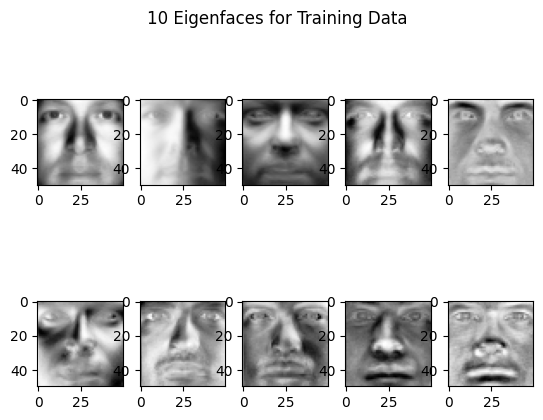

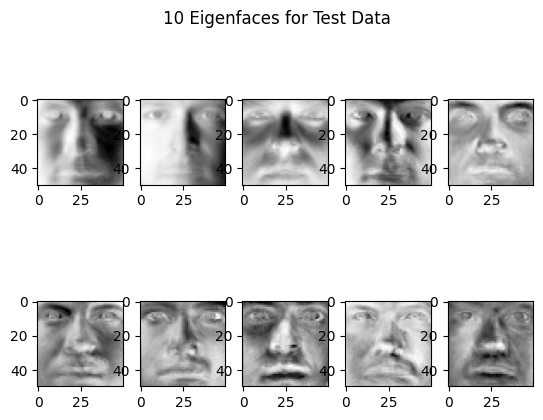

In [54]:
# Function to compute and display eigenfaces
def plot_eigenfaces(mean_subtracted_data, title):
    U, Sigma, Vt = np.linalg.svd(mean_subtracted_data)
    plt.figure()
    for i in range(0, 10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(Vt[i, :].reshape(50, 50), cmap=cm.Greys_r)
    plt.suptitle(title)
    plt.show()

# Eigenfaces for the training set
plot_eigenfaces(mean_subtracted_train, '10 Eigenfaces for Training Data')

# Eigenfaces for the test set
plot_eigenfaces(mean_subtracted_test, '10 Eigenfaces for Test Data')


# part F

In [55]:

# Assuming mean_subtracted_train and mean_subtracted_test are already defined

# Calculate Eigenfaces for training data
U, Sigma, Vt = np.linalg.svd(mean_subtracted_train)

# Set r
r = 10

# Compute r-dimensional feature matrix F for training data
F_feature_matrix_train = mean_subtracted_train.dot(np.transpose(Vt[:r,:]))

# Compute r-dimensional feature matrix F for test data using training data's Vt
F_feature_matrix_test = mean_subtracted_test.dot(np.transpose(Vt[:r,:]))

# Print F and F_test
print("F_feature_matrix_train:")
print(F_feature_matrix_train)
print("F_feature_matrix_test:")
print(F_feature_matrix_test)


F_feature_matrix_train:
[[-3071.98503336  -440.55436121  -127.39265075 ...   178.04529608
   -119.05731126    30.29017967]
 [ 2197.05744965  -760.60052365  -562.46174352 ...   182.9450855
    113.96838521  -384.43352369]
 [ 2473.33262159   163.06716256   608.22806399 ...   -85.3894248
   -584.65403477  -325.92945615]
 ...
 [ 1841.10091761  1907.14587095  -226.44323    ...    51.07709295
     33.22865825    26.8049682 ]
 [-2586.30249394   163.15381029  -151.68973865 ...  -265.28513326
    144.82934451  -105.81505369]
 [ 1363.71276667  2930.60526623  1287.14464964 ...   311.35304262
    162.68186295  -198.41107223]]
F_feature_matrix_test:
[[ 1.97547669e+03  5.30835552e+01  1.56924329e+03  1.80272248e+00
   8.32099016e+01 -3.14103292e+01 -2.40990762e+02 -1.64718083e+02
  -8.34103348e+02 -1.85326815e+02]
 [ 6.99288660e+02  1.78444521e+03 -8.83082635e+02  2.25056407e+02
   1.48074873e+01  2.01002918e+02 -1.46643128e+02  3.35192380e+02
   1.16748467e+02 -3.78608774e+02]
 [-2.89306329e+03  3.

# part G

Testing Accuracy for r=100: 98.0 %


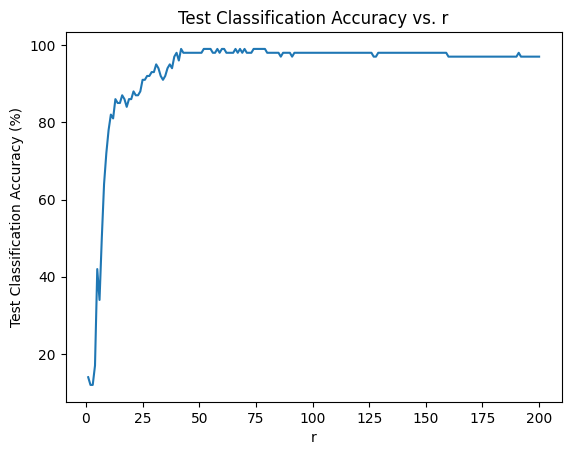

In [63]:
# Part H: Initial r = 10
r_initial = 100
F_feature_matrix_train = mean_subtracted_train.dot(np.transpose(Vt[:r_initial, :]))
F_feature_matrix_test = mean_subtracted_test.dot(np.transpose(Vt[:r_initial, :]))

# Scaling data
scaler = StandardScaler()
F_feature_matrix_train = scaler.fit_transform(F_feature_matrix_train)
F_feature_matrix_test = scaler.transform(F_feature_matrix_test)

logistic_regression_model = LogisticRegression(max_iter=1000, multi_class='ovr')
logistic_regression_model.fit(F_feature_matrix_train, train_labels)

test_acc = logistic_regression_model.score(F_feature_matrix_test, test_labels)
print(f'Testing Accuracy for r={r_initial}: {test_acc * 100} %')

# Part I: Compute accuracies for different r values
Accuracy = np.zeros(200)
scaler = StandardScaler()

for r in range(1, 201):
    F_feature_matrix_train = mean_subtracted_train.dot(np.transpose(Vt[:r, :]))
    F_feature_matrix_test = mean_subtracted_test.dot(np.transpose(Vt[:r, :]))

    # Scaling data
    F_feature_matrix_train = scaler.fit_transform(F_feature_matrix_train)
    F_feature_matrix_test = scaler.transform(F_feature_matrix_test)

    logistic_regression_model = LogisticRegression(max_iter=1000, multi_class='ovr')
    logistic_regression_model.fit(F_feature_matrix_train, train_labels)
    Accuracy[r-1] = logistic_regression_model.score(F_feature_matrix_test, test_labels) * 100

# Plotting the accuracy array
plt.plot(range(1, 201), Accuracy)
plt.xlabel('r')
plt.ylabel('Test Classification Accuracy (%)')
plt.title('Test Classification Accuracy vs. r')
plt.show()


Original label: 10, Predicted label: 10


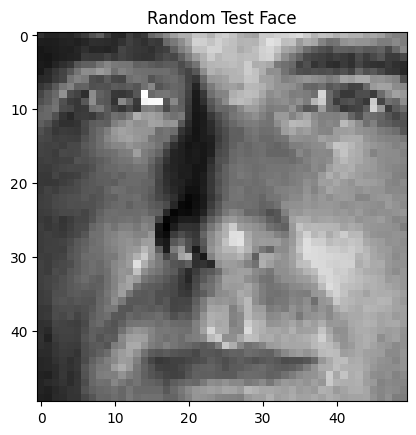

In [96]:
import random

# Scaling for the reduced feature matrix
scaler_reduced = StandardScaler()
F_feature_matrix_train = scaler_reduced.fit_transform(F_feature_matrix_train)
F_feature_matrix_test = scaler_reduced.transform(F_feature_matrix_test)

# Pick a random test image
random_idx = random.randint(0, len(test_data) - 1)
random_test_image = mean_subtracted_test[random_idx]
random_test_label = test_labels[random_idx]

# Get the prediction from the trained model
F_feature_matrix_test_single = mean_subtracted_test.dot(np.transpose(Vt[:r_initial, :]))
F_feature_matrix_test_single = scaler_reduced.transform(F_feature_matrix_test_single)  # Use the new scaler here
# Fit logistic regression on the scaled and reduced training data
logistic_regression_model = LogisticRegression(max_iter=1000, multi_class='ovr')
logistic_regression_model.fit(F_feature_matrix_train, train_labels)
predicted_label = logistic_regression_model.predict(F_feature_matrix_test_single[random_idx].reshape(1, -1))



# Display the original and predicted labels
print(f"Original label: {random_test_label}, Predicted label: {predicted_label[0]}")

# Show the original test image
plt.imshow(random_test_image.reshape(50, 50), cmap='gray')
plt.title("Random Test Face")
plt.show()

# For fun...

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

Ensemble model accuracy: 85.0%


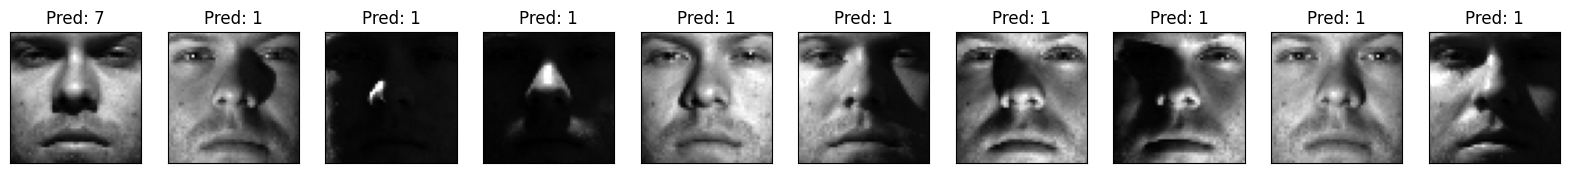

In [82]:
# Data Scaling
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(mean_subtracted_train)
scaled_test_data = scaler.transform(mean_subtracted_test)

# Initial r = 10
r_initial = 10
F_feature_matrix_train = scaled_train_data.dot(np.transpose(Vt[:r_initial, :]))
F_feature_matrix_test = scaled_test_data.dot(np.transpose(Vt[:r_initial, :]))

# Hyperparameter tuning using GridSearchCV
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

grid_logistic = GridSearchCV(LogisticRegression(max_iter=10000, multi_class='ovr'), param_grid_logistic, cv=5)
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

grid_logistic.fit(F_feature_matrix_train, train_labels)
grid_rf.fit(F_feature_matrix_train, train_labels)
grid_svm.fit(F_feature_matrix_train, train_labels)

# Ensemble Method: Voting Classifier
ensemble_model = VotingClassifier(estimators=[('lr', grid_logistic.best_estimator_),
                                              ('rf', grid_rf.best_estimator_),
                                              ('svm', grid_svm.best_estimator_)], voting='hard')

ensemble_model.fit(F_feature_matrix_train, train_labels)
ensemble_accuracy = ensemble_model.score(F_feature_matrix_test, test_labels)
print(f'Ensemble model accuracy: {ensemble_accuracy * 100}%')

# Output 10 sample images along with their predictions
predictions = ensemble_model.predict(F_feature_matrix_test[:10])

fig, axes = plt.subplots(1, 10,  figsize=(20, 20), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(test_data[i].reshape(50, 50), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}")

plt.show()


Stacked Ensemble model accuracy: 89.0%


/Users/msturman00/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


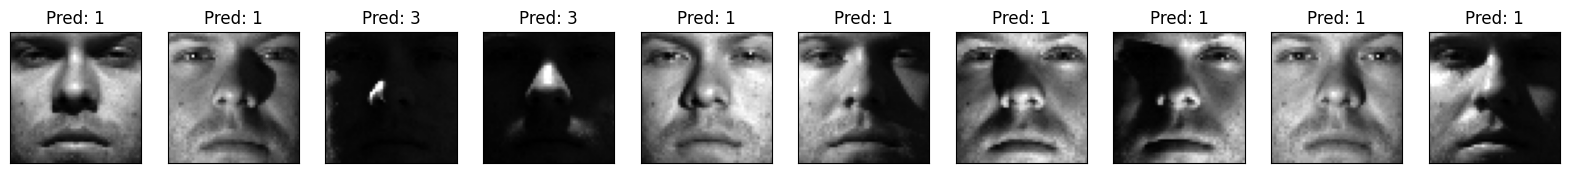

In [84]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Data Scaling
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(mean_subtracted_train)
scaled_test_data = scaler.transform(mean_subtracted_test)

# Initial r = 10
r_initial = 10
F_feature_matrix_train = scaled_train_data.dot(np.transpose(Vt[:r_initial, :]))
F_feature_matrix_test = scaled_test_data.dot(np.transpose(Vt[:r_initial, :]))

# Define base models
level0 = []

# Logistic Regression Grid Search
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logistic = GridSearchCV(LogisticRegression(max_iter=10000, multi_class='ovr'), param_grid_logistic, cv=5)
grid_logistic.fit(F_feature_matrix_train, train_labels)
level0.append(('lr', grid_logistic.best_estimator_))

# Random Forest Grid Search
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(F_feature_matrix_train, train_labels)
level0.append(('rf', grid_rf.best_estimator_))

# SVM Grid Search
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3, 4]}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(F_feature_matrix_train, train_labels)
level0.append(('svm', grid_svm.best_estimator_))

# Meta learner model
level1 = LogisticRegression()

# Stacked ensemble model
stacked_ensemble = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
stacked_ensemble.fit(F_feature_matrix_train, train_labels)
ensemble_accuracy = stacked_ensemble.score(F_feature_matrix_test, test_labels)

# Output 10 sample images along with their predictions
predictions = stacked_ensemble.predict(F_feature_matrix_test[:10])

print(f'Stacked Ensemble model accuracy: {ensemble_accuracy * 100}%')
fig, axes = plt.subplots(1, 10,  figsize=(20, 20), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(test_data[i].reshape(50, 50), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]} This is on the Test_Data")

plt.show()
